In [12]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('ChurnData.csv')
df.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [15]:
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [16]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [17]:
churn_df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip','callcard', 'wireless', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

C:\Users\AMIRH~1.DAL\AppData\Local\Temp/ipykernel_16156/3246245842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df['churn'] = churn_df['churn'].astype('int')


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [18]:
X = np.asanyarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
y = np.asanyarray(churn_df['churn'])
print(X[0:5])
print(y[0:5])

[[ 11.  33.   7. 136.   5.   5.   0.]
 [ 33.  33.  12.  33.   2.   0.   0.]
 [ 23.  30.   9.  30.   1.   2.   0.]
 [ 38.  35.   5.  76.   2.  10.   1.]
 [  7.  35.  14.  80.   2.  15.   0.]]
[1 1 0 0 0]


In [19]:
# Normalize the data
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
print(X[0:5])

[[-1.13518441 -0.62595491 -0.4588971   0.4751423   1.6961288  -0.58477841
  -0.85972695]
 [-0.11604313 -0.62595491  0.03454064 -0.32886061 -0.6433592  -1.14437497
  -0.85972695]
 [-0.57928917 -0.85594447 -0.261522   -0.35227817 -1.42318853 -0.92053635
  -0.85972695]
 [ 0.11557989 -0.47262854 -0.65627219  0.00679109 -0.6433592  -0.02518185
   1.16316   ]
 [-1.32048283 -0.47262854  0.23191574  0.03801451 -0.6433592   0.53441472
  -0.85972695]]


In [20]:
#train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set: ', X_test.shape,  y_test.shape)


Train set: (160, 7) (160,)
Test set:  (40, 7) (40,)


In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 4  7]
 [ 5 24]]
Confusion matrix, without normalization
[[ 4  7]
 [ 5 24]]
Confusion matrix, without normalization
[[ 4  7]
 [ 5 24]]
Confusion matrix, without normalization
[[ 4  7]
 [ 5 24]]
Confusion matrix, without normalization
[[ 4  7]
 [ 5 24]]


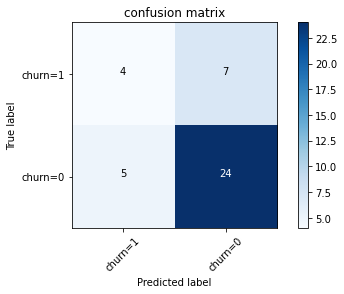

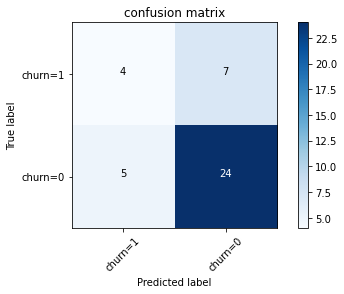

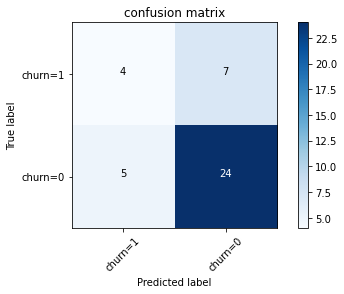

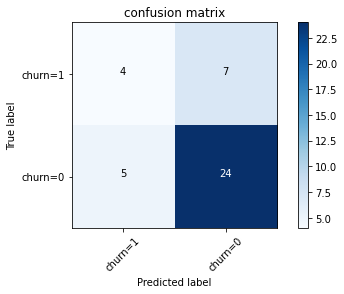

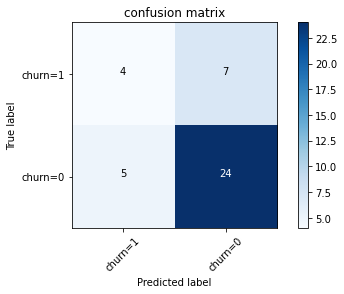

In [ ]:
#choose the solver
from sklearn.linear_model import LogisticRegression

for solver in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
    lr = LogisticRegression(C=1.0, solver=solver)
    lr.fit(X_train, y_train)
    cnf_matrix = confusion_matrix(y_test, lr.predict(X_test), labels=[1,0])
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize=False,  title='confusion matrix')

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
logreg = LogisticRegression (C=0.01, solver='liblinear').fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [ ]:
y_prob = logreg.predict_proba(X_test)
y_prob

array([[0.4 , 0.6 ],
       [0.54, 0.46],
       [0.5 , 0.5 ],
       [0.54, 0.46],
       [0.51, 0.49],
       [0.52, 0.48],
       [0.71, 0.29],
       [0.61, 0.39],
       [0.5 , 0.5 ],
       [0.37, 0.63],
       [0.67, 0.33],
       [0.5 , 0.5 ],
       [0.43, 0.57],
       [0.72, 0.28],
       [0.44, 0.56],
       [0.52, 0.48],
       [0.49, 0.51],
       [0.51, 0.49],
       [0.69, 0.31],
       [0.41, 0.59],
       [0.48, 0.52],
       [0.51, 0.49],
       [0.68, 0.32],
       [0.52, 0.48],
       [0.66, 0.34],
       [0.53, 0.47],
       [0.55, 0.45],
       [0.42, 0.58],
       [0.44, 0.56],
       [0.41, 0.59],
       [0.42, 0.58],
       [0.51, 0.49],
       [0.55, 0.45],
       [0.54, 0.46],
       [0.57, 0.43],
       [0.54, 0.46],
       [0.56, 0.44],
       [0.53, 0.47],
       [0.68, 0.32],
       [0.57, 0.43]])

In [ ]:
#Evaluate the model
from sklearn.metrics import jaccard_score
print('jaccard score is :',jaccard_score(y_test, y_pred, pos_label=0))


jaccard score is : 0.6666666666666666


Confusion matrix, without normalization
[[ 7  4]
 [ 7 22]]


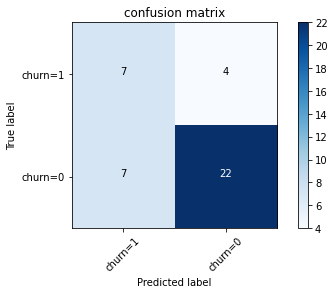

In [ ]:
#confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize=False,  title='confusion matrix')

In [ ]:
#report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        29
           1       0.50      0.64      0.56        11

    accuracy                           0.73        40
   macro avg       0.67      0.70      0.68        40
weighted avg       0.75      0.72      0.73        40

